# Analyzing Open University Learning Analytics Dataset

#### Reference: https://archive.ics.uci.edu/ml/datasets/Open+University+Learning+Analytics+dataset#

#### Complete data and data description: https://analyse.kmi.open.ac.uk/open_dataset

Open University Learning Analytics Dataset (OULAD) contains data about courses, students and their interactions with Virtual Learning Environment (VLE) for seven selected courses (called modules)----AAA, BBB, CCC, DDD, EEE, FFF, GGG. Presentations of courses start in February and October - they are marked by 'B' and 'J' respectively (2013B, 2013J, 2014B, 2014J). The dataset consists of tables connected using unique identifiers. Dataset is stored in several csv files
<ol>
    <li>assessements.csv (206)</li>
    <li>courses.csv (22)</li>
    <li>studentAssessment.csv (173912)</li>
    <li>studentInfo.csv (32593)</li>
    <li>studentRegistration.csv (32593)</li>
    <li>studentVle.csv (10655280)</li>
    <li>vle.csv (6364)</li>
</ol>

------------------------------------------------------------------------------------------------------------------------------

<a id='TOC'></a>
## Content

1. [Executive summary](#Executive_summary)
2. [Introduction](#Introduction)
3. [Problem statement](#Problem_statement)
4. [Solution methodology](#Solution_methodology)
5. [Experimental setup and data used](#Experimental)
6. [Results](#Results)
7. [Conclusions](#Conclusions)


--------------------------------------------------------------------------------------------------------------

<a id='Executive_summary'></a>
## 1. Executive summary
###### [TOC](#TOC)

<a id='Introduction'></a>
## 2. Introduction
###### [TOC](#TOC)

Effective identification of the vulnerable students allows the institution to conduct appropriate measures in order to keep the students on track. Evaluation and overview outcomes of courses can also be a valuable tool with which the teaching staff is able to recognize difficulty points and enhance possible lectures. In addition, analysis and estimation of the learning experience with a virtual learning environment may be valuable resources for promoting large open online courses. The Open University introduces various initiatives to promote work in this field, such as calling by specialist support teams and, above all, building a dataset. The reality, combined with aggregated data from click-flow experiences of students in the Virtual Learning environment, makes a date set special. This helps student performance to be evaluated, defined by their actions. The data collection provides information on 22 classes, 32,593 candidates, their assessment outcomes, and their experiences with the VLE as a result of a routine review of student clicks.


<a id='Problem_statement'></a>
## 3. Problem statement
###### [TOC](#TOC)

<a id='Solution_methodology'></a>
## 4. Solution methodology
###### [TOC](#TOC)

<p style="color:red;"> TODO: Planning for our inference</p>

<a id='Experimental'></a>
## 5. Experimental setup and data used
###### [TOC](#TOC)

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
plt.rcdefaults()
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Read the Dataset
student_info = pd.read_csv('Dataset/studentInfo.csv')
student_assessment = pd.read_csv('Dataset/studentAssessment.csv')
student_registration = pd.read_csv('Dataset/studentRegistration.csv')
student_vle = pd.read_csv('Dataset/studentVle.csv')
assessments = pd.read_csv('Dataset/assessments.csv')
courses = pd.read_csv('Dataset/courses.csv')
vle = pd.read_csv('Dataset/vle.csv')

print('Courses     : ',courses.shape[0])
print('Assessments : ',assessments.shape[0])
print('vle(Virtual Learning Environment) : ',vle.shape[0])
print('Student Info         : ',student_info.shape[0])
print('student Assessment   : ',student_assessment.shape[0])
print('student Registration : ',student_registration.shape[0])
print('student Vle          : ',student_vle.shape[0])

Courses     :  22
Assessments :  206
vle(Virtual Learning Environment) :  6364
Student Info         :  32593
student Assessment   :  173912
student Registration :  32593
student Vle          :  10655280


<p style="color:red;"> TODO: Add student_info descriptions - column definitions </p>

In [3]:
student_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


<p style="color:red;"> TODO: Add student_assessment descriptions - column definitions </p>

In [4]:
student_assessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78
1,1752,28400,22,0,70
2,1752,31604,17,0,72
3,1752,32885,26,0,69
4,1752,38053,19,0,79


<p style="color:red;"> TODO: Add student_registration descriptions - column definitions </p>

In [5]:
student_registration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159,?
1,AAA,2013J,28400,-53,?
2,AAA,2013J,30268,-92,12
3,AAA,2013J,31604,-52,?
4,AAA,2013J,32885,-176,?


<p style="color:red;"> TODO: Add student_vle descriptions - column definitions </p>

In [6]:
student_vle.head()


,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


<p style="color:red;"> TODO: Add assessments descriptions - column definitions </p>

In [7]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19,10.0
1,AAA,2013J,1753,TMA,54,20.0
2,AAA,2013J,1754,TMA,117,20.0
3,AAA,2013J,1755,TMA,166,20.0
4,AAA,2013J,1756,TMA,215,30.0


<p style="color:red;"> TODO: Add courses descriptions - column definitions </p>

In [8]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


<p style="color:red;"> TODO: Add vle descriptions - column definitions </p>

In [9]:
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,?,?
1,546712,AAA,2013J,oucontent,?,?
2,546998,AAA,2013J,resource,?,?
3,546888,AAA,2013J,url,?,?
4,547035,AAA,2013J,resource,?,?


-------------------------------------------------------------------------------------------------------------------------------

<a id='Results'></a>
## 6. Results
###### [TOC](#TOC)

### Exploratory data analysis of Student Info

<p> Let's get a birds eye view of the student infos first.</p>

Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: final_result, dtype: int64


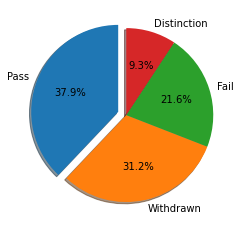

In [10]:
# Print totals of each type(4 total) of final result labels
print(student_info['final_result'].value_counts())

labels = student_info['final_result'].unique()
sizes = student_info['final_result'].value_counts()

# Which slice to cut out (for this it's Pass)
explode = (0.1, 0, 0, 0) 

# using the variable ax for single a Axes
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

From the Pie chart, we find that about 21.6% students fail in their respective courses.

<p>Let's start checking the demographic overview of the students</p>

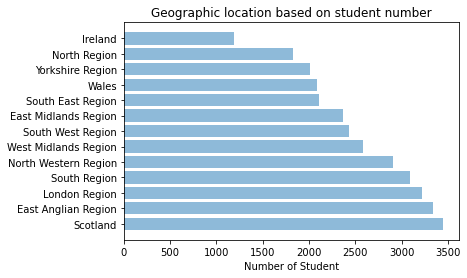

In [11]:
objects = ('Scotland', 
           'East Anglian Region', 
           'London Region', 
           'South Region',
           'North Western Region', 
           'West Midlands Region', 
           'South West Region', 
           'East Midlands Region', 
           'South East Region',
           'Wales', 
           'Yorkshire Region',
           'North Region',
           'Ireland' )
y_pos = np.arange(len(objects))
# Region wise total students
total_students_per_region = student_info['region'].value_counts(sort=True).to_list()
plt.barh(y_pos, total_students_per_region, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Number of Student')
plt.title('Geographic location based on student number')
plt.show()

Here we found a list of regions, sorted by student number.

<p style="color:red;"> TODO: Check Interpretation | Make a viable story line for this - Update: Couldn't find any. #Remote it </p>

Which region students takes more credits than others region?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

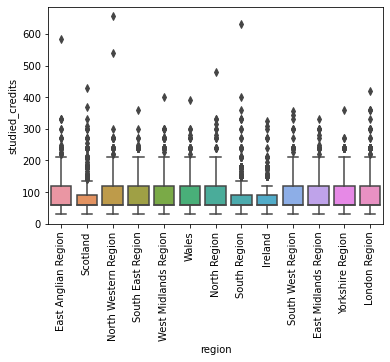

In [12]:
sns.boxplot(x = 'region', y = 'studied_credits', data=student_info)
plt.xticks(rotation = 90)

What is the academic performance scenario belongs to each regional students?

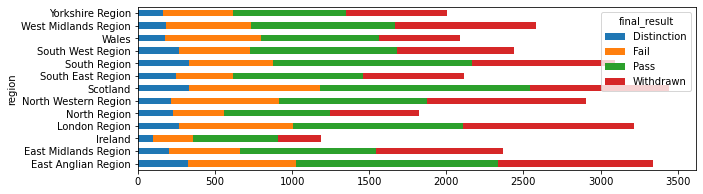

In [13]:
pd.crosstab(student_info.region, student_info.final_result).plot.barh(stacked = True, figsize=(10,3));

We found failures in some regions more than other regions. So we want to investigate more into those regional students.

In [14]:
student_info_fail = student_info[student_info["final_result"] =='Fail']

total_students_by_region = student_info.groupby(['region']).size().reset_index(name='Total Student').sort_values(by="Total Student",ascending=False)
failed_students_by_region = student_info_fail.groupby(['region']).size().reset_index(name='Total Failed').sort_values(by="Total Failed",ascending=False)
merged_total_and_failed_by_region = pd.merge(failed_students_by_region, total_students_by_region, on='region')
merged_total_and_failed_by_region['Percentage'] = round(merged_total_and_failed_by_region['Total Failed'] / merged_total_and_failed_by_region['Total Student'] * 100,3)

regions_with_higher_failure_ratio = merged_total_and_failed_by_region[merged_total_and_failed_by_region['Percentage'] >20]
regions_with_higher_failure_ratio


,region,Total Failed,Total Student,Percentage
0,Scotland,852,3446,24.724
1,London Region,744,3216,23.134
2,North Western Region,704,2906,24.226
3,East Anglian Region,698,3340,20.898
4,Wales,620,2086,29.722
5,West Midlands Region,551,2582,21.340
9,Yorkshire Region,449,2006,22.383
12,Ireland,261,1184,22.044


We see that the failure rate is more than 20% in 7 different regions among 13. Let's dig deeper into these 7 regions next. </br>

What is the gender scenerio among the students? Time to find out which gender is dominating 

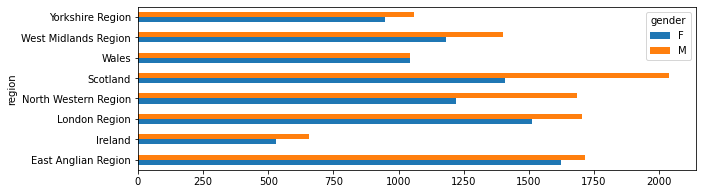

In [15]:
filtered_student_info = student_info[student_info.region.isin(regions_with_higher_failure_ratio['region'])]
pd.crosstab(filtered_student_info.region, filtered_student_info.gender).plot.barh(figsize=(10,3));

It appears the regions are male dominated every where. In Wales the numbers are same for male & female.

But what about Higher Education scenario in this areas? Let's find out

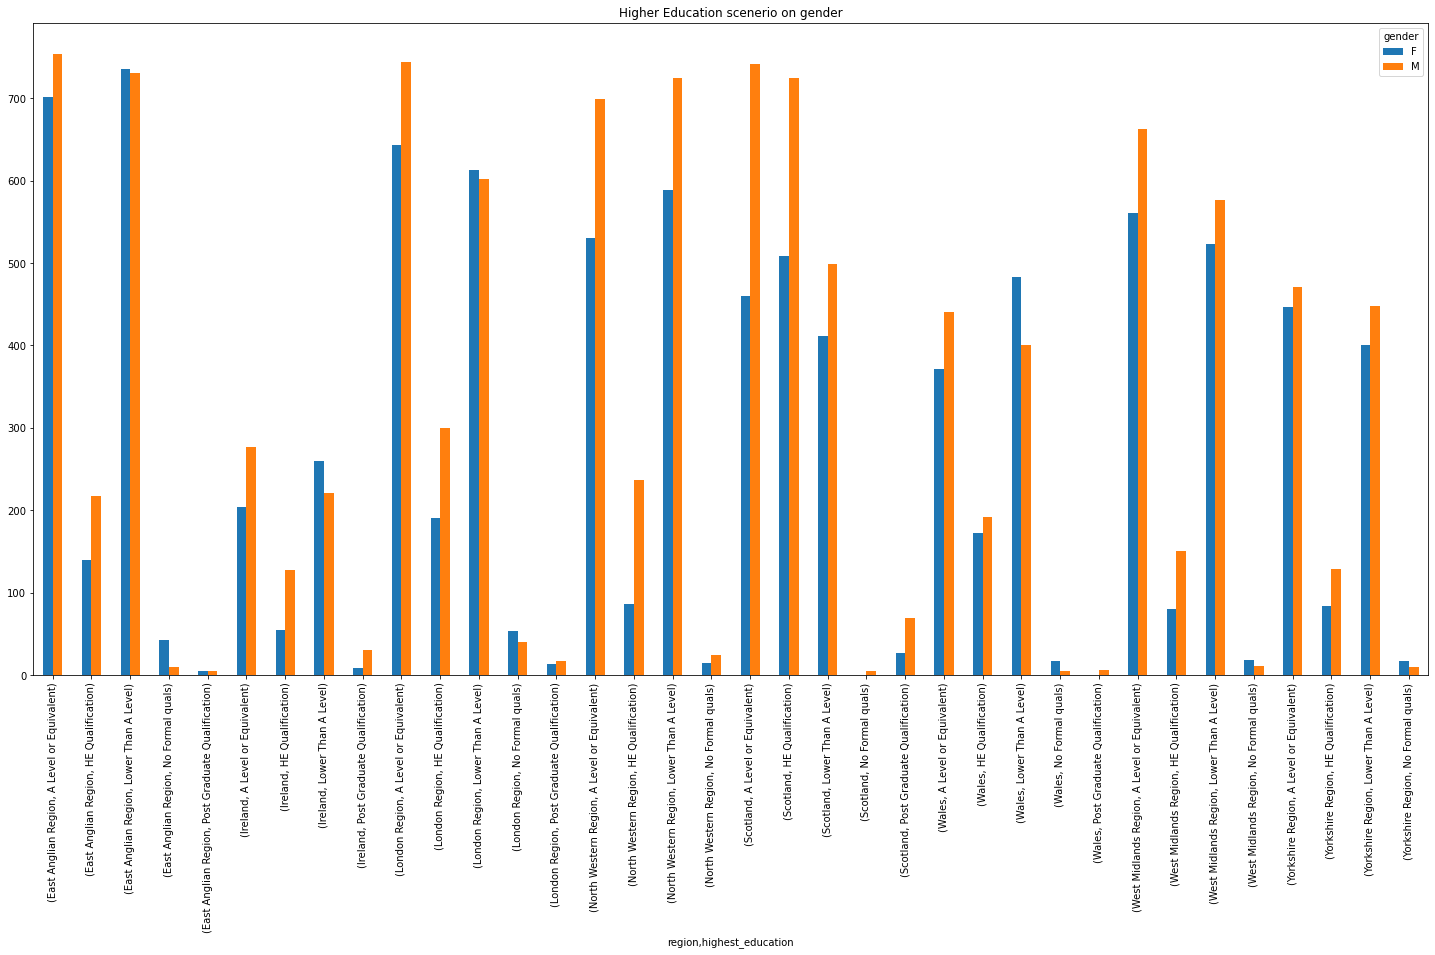

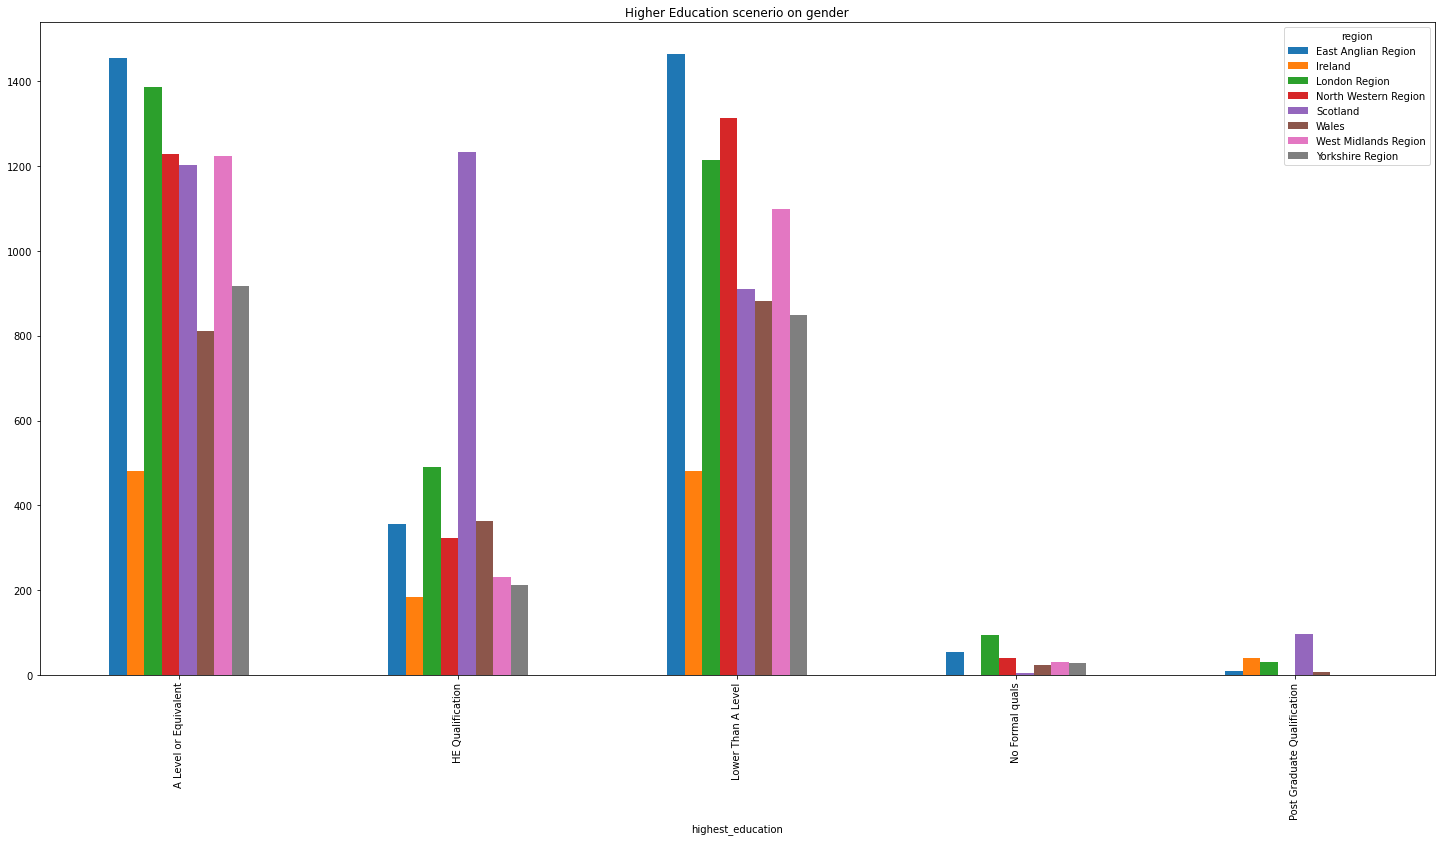

In [16]:
filtered_student_info.groupby(['region','highest_education','gender']).size().unstack().plot(kind='bar', title='Higher Education scenerio on gender',figsize=(25,12))
plt.show()

filtered_student_info.groupby(['highest_education','region']).size().unstack().plot(kind='bar', title='Higher Education scenerio on gender',figsize=(25,12))
plt.show()

This shows that very few regions(4 out of 8) have the students with <b>Post Graduation Qualification</b>. Even though that number is very much low. Again the discrimination among male & female in all type of education level is significant.

Question is, which category of Higher Education most students have?

highest_education
A Level or Equivalent          8708
HE Qualification               3392
Lower Than A Level             8216
No Formal quals                 269
Post Graduate Qualification     181
dtype: int64

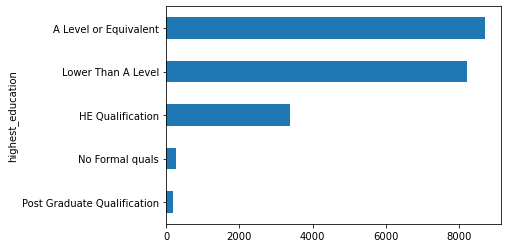

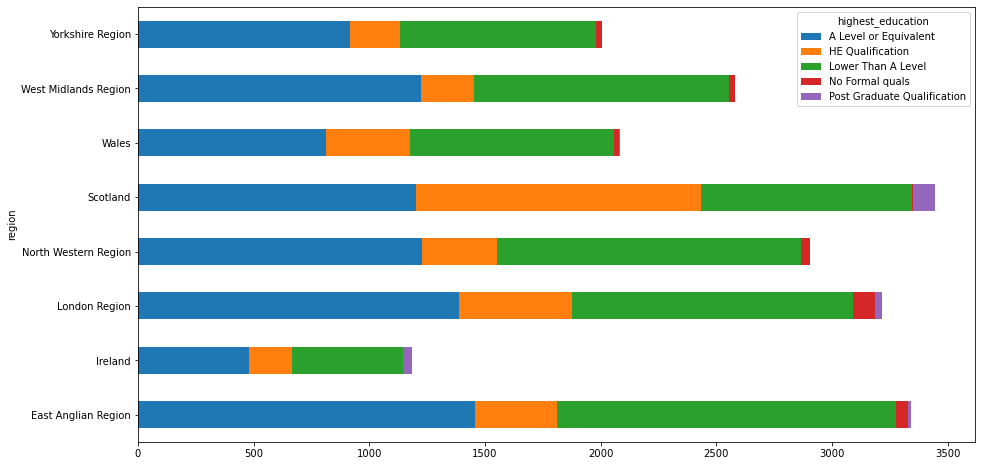

In [17]:
filtered_student_info.groupby(['highest_education']).size().sort_values(ascending=True).plot(kind='barh')

pd.crosstab(filtered_student_info.region, filtered_student_info.highest_education).plot.barh(stacked = True, figsize=(15,8))

filtered_student_info.groupby(['highest_education']).size()

It turns out most of the students, about 8708 have <b>A Level or Equivalent</b> education level

Question: Is there any clue for disability affecting the education level in these regions?

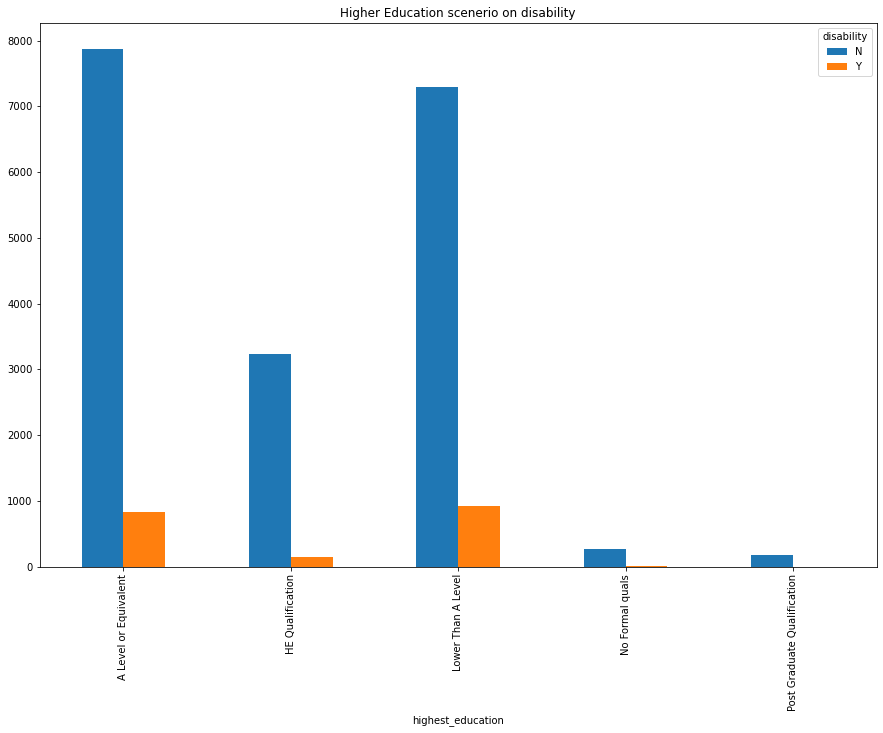

In [18]:
filtered_student_info.groupby(['highest_education','disability']).size().unstack().plot(kind='bar', title='Higher Education scenerio on disability',figsize=(15,10))
plt.show()

The answer is no! The gap between disabled and non-disabled student in any education level is huge. So there is no clear evidence that disability is hampering achieving higher education.

Now we'll check number of previous attempts  by the reigion and try to find out if it reflects the education level of the students of that the regions. 
We presume that, where ever overall education level is low, the number of previous attemps in those regions should be higher.

region
Scotland                448
London Region           416
East Anglian Region     393
West Midlands Region    382
North Western Region    366
Wales                   331
Yorkshire Region        242
Ireland                 163
dtype: int64

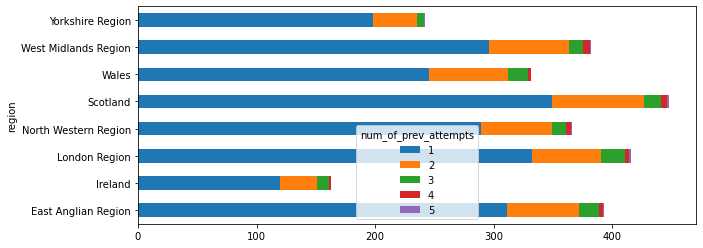

In [19]:
filtered_student_info_previous_attempt_not_0 = filtered_student_info[filtered_student_info['num_of_prev_attempts'] != 0]
pd.crosstab(filtered_student_info_previous_attempt_not_0.region, filtered_student_info_previous_attempt_not_0.num_of_prev_attempts).sort_values('region', ascending=True).plot.barh(stacked = True, figsize=(10,4));

# To get numeric values
filtered_student_info_previous_attempt_not_0.groupby(['region']).size().sort_values(ascending=False)

We found that <b>Scotland</b> tops with 448 students, followed by <b>London</b> with 416 students in the case of previous attempts. 

So lets find out students with respect to their education level by the regions to check our previous assumption.

highest_education,A Level or Equivalent,HE Qualification,Lower Than A Level,No Formal quals,Post Graduate Qualification
region,,,,,
East Anglian Region,135,30,218,9,1
Ireland,63,20,74,0,6
London Region,193,65,143,10,5
North Western Region,142,30,190,4,0
Scotland,157,136,141,0,14
Wales,123,38,166,3,1
West Midlands Region,169,30,177,6,0
Yorkshire Region,112,21,102,7,0


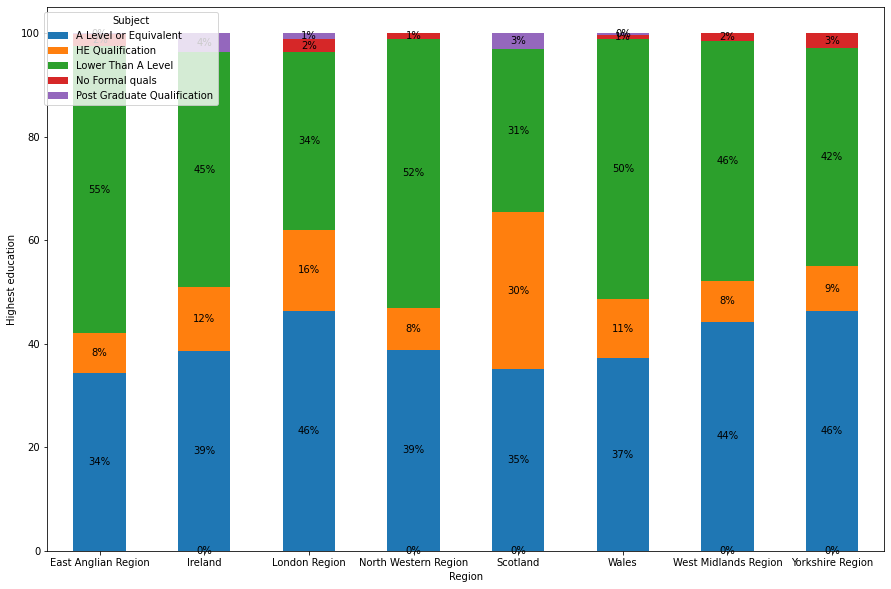

In [20]:
# Table of regions with students on each education level
display(pd.crosstab(filtered_student_info_previous_attempt_not_0['region'], filtered_student_info_previous_attempt_not_0['highest_education']))

ax = pd.crosstab(filtered_student_info_previous_attempt_not_0['region'], filtered_student_info_previous_attempt_not_0['highest_education']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(15,10),stacked=True, rot=0)

plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0), title="Subject")

plt.xlabel('Region')
plt.ylabel('Highest education')

# Create the rack
for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='center')

plt.show()

Students from London and Scotland have the most number of previous attemps. However, from the last plot it shows that this two regions has the highest parcentage of educated(considering A level or Equivalent/HE Qualification/Post Graduate Qualification as good educatiion measure) students, which invalidate out previous assumption. 

Question - Students from which education band needed to take most previous attempts?

highest_education
A Level or Equivalent          1094
HE Qualification                370
Lower Than A Level             1211
No Formal quals                  39
Post Graduate Qualification      27
dtype: int64

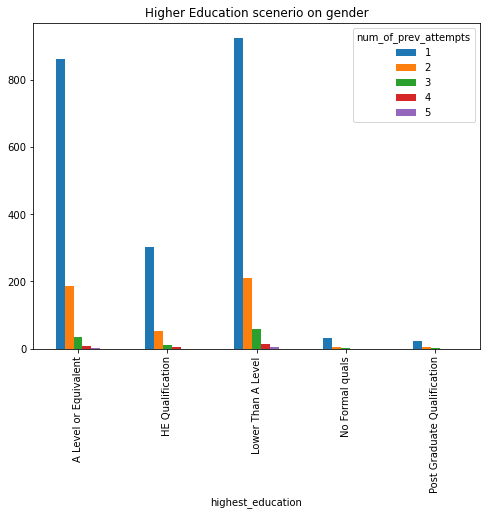

In [21]:
# To get the numeric figure for each educational level
display(filtered_student_info_previous_attempt_not_0.groupby(['highest_education']).size())

filtered_student_info_previous_attempt_not_0.groupby(['highest_education','num_of_prev_attempts']).size().unstack().plot(kind='bar', title='Higher Education scenerio on gender',figsize=(8,6))
plt.show()

It shows 1211 students(max among the education level) who has previous attempts, falls in the education level <b>Lower Than A Level<b/>

<p>Question - Which age band they fall into? <br/>
What we mean is, those students who have one or more previous attemps and who fall under the education level of <i>Lower Than A Level</i>, we want to find their age level.</p>

highest_education            age_band
A Level or Equivalent        0-35        794
                             35-55       298
                             55<=          2
HE Qualification             0-35        202
                             35-55       158
                             55<=         10
Lower Than A Level           0-35        880
                             35-55       330
                             55<=          1
No Formal quals              0-35         31
                             35-55         8
Post Graduate Qualification  0-35          8
                             35-55        19
dtype: int64

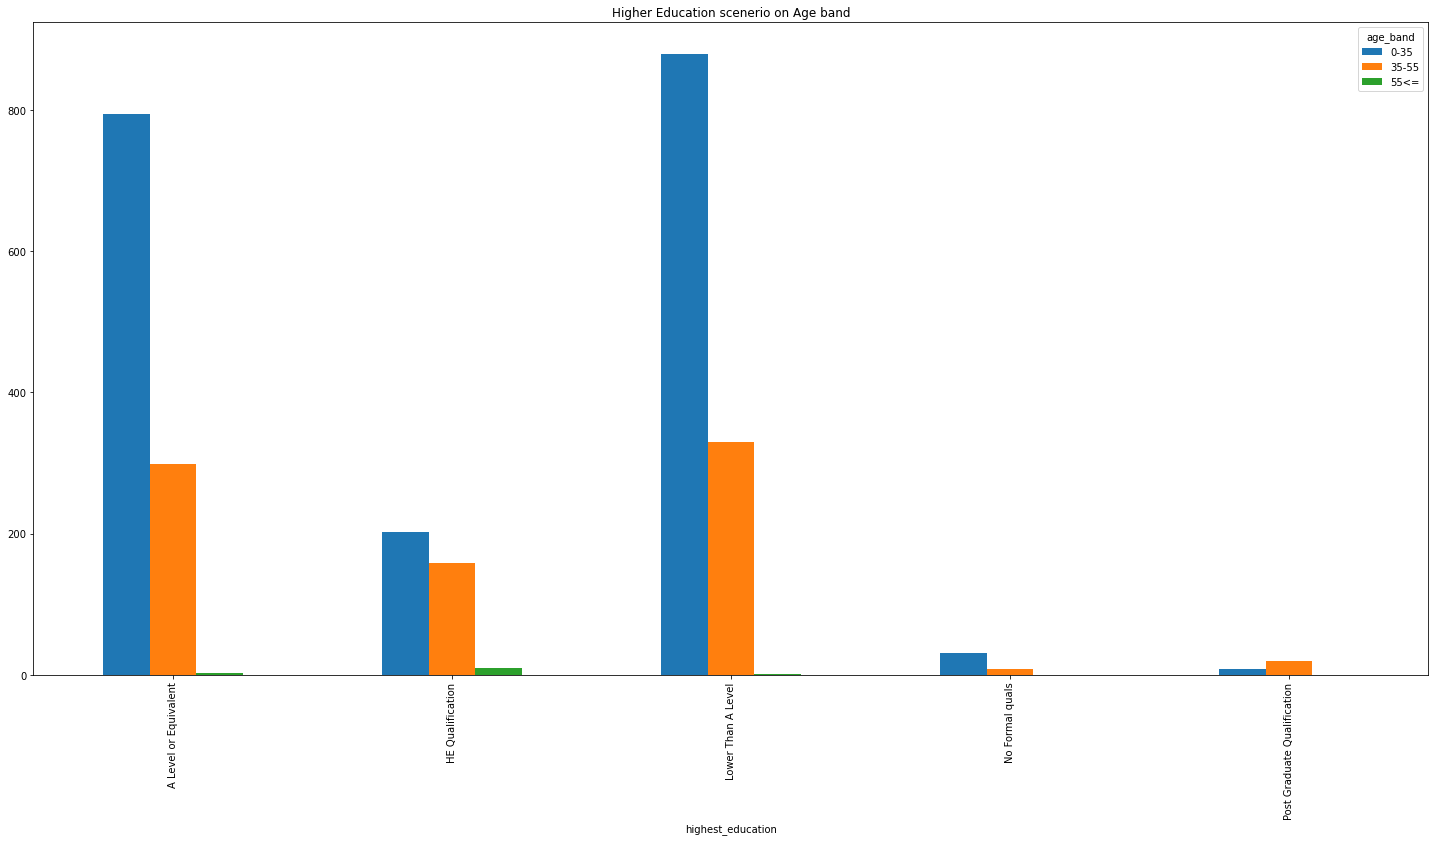

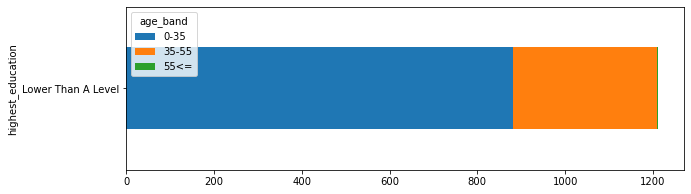

In [22]:
display(filtered_student_info_previous_attempt_not_0.groupby(['highest_education','age_band']).size())
filtered_student_info_previous_attempt_not_0.groupby(['highest_education','age_band']).size().unstack().plot(kind='bar', title='Higher Education scenerio on Age band',figsize=(25,12))
plt.show()

filtered_student_info_previous_attempt_not_0_lower_A_Level = filtered_student_info_previous_attempt_not_0[filtered_student_info_previous_attempt_not_0["highest_education"]== "Lower Than A Level"]
pd.crosstab(filtered_student_info_previous_attempt_not_0_lower_A_Level.highest_education, filtered_student_info_previous_attempt_not_0_lower_A_Level.age_band).plot.barh(stacked = True, figsize=(10,3));

We find that 880 students are in the age band of 0-35, who have education level Lower then A Level.

Question: Which course module are more frequently takes on each semester?

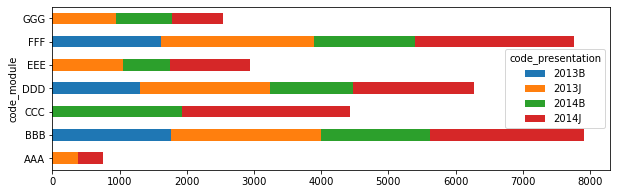

In [23]:
pd.crosstab(student_info.code_module, student_info.code_presentation).plot.barh(stacked = True, figsize=(10,3));

Question: Which course module are more frequently takes on each semester for which education level is lower than A level?

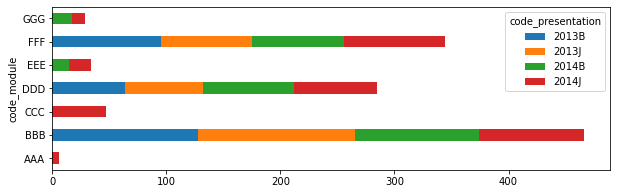

In [24]:
pd.crosstab(filtered_student_info_previous_attempt_not_0_lower_A_Level.code_module, filtered_student_info_previous_attempt_not_0_lower_A_Level.code_presentation).plot.barh(stacked = True, figsize=(10,3));

It appears that very few students took these course - AAA/CCC/EEE/GGG, who has previous attemps and education level lower than A level.

Question: Which course module need to have previous attempt for student which education level is lower than A level?

Scenerio of all students who have one or more previous attempts in the courses.

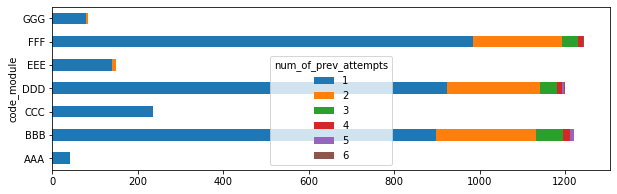

In [25]:
student_info_attempt_not_0 = student_info[student_info['num_of_prev_attempts'] != 0]
pd.crosstab(student_info_attempt_not_0.code_module, student_info_attempt_not_0.num_of_prev_attempts).plot.barh(stacked = True, figsize=(10,3));

Scenerio of students who have one or more previous attempts and education level of <i>Lower Than A Level</i>, in the courses.

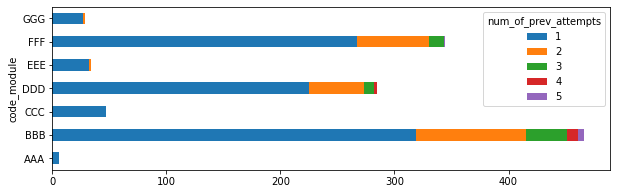

In [26]:
pd.crosstab(filtered_student_info_previous_attempt_not_0_lower_A_Level.code_module, filtered_student_info_previous_attempt_not_0_lower_A_Level.num_of_prev_attempts).plot.barh(stacked = True, figsize=(10,3));

Looks like most students struggled in these courses: BBB/DDD/FFF. Additionally, BBB tops as among the students who have one or more previous attempts and education level of Lower Than A Level in case of previous attempts.

In [27]:
# Drop all rows that contain '?' to clearup unknown data
filtered_student_info_previous_attempt_not_0_lower_A_Level = filtered_student_info_previous_attempt_not_0_lower_A_Level[(filtered_student_info_previous_attempt_not_0_lower_A_Level != '?').all(axis=1)]

Question: How is the imd band Stats based on number of attempt for student, of whose education level is lower than A level?

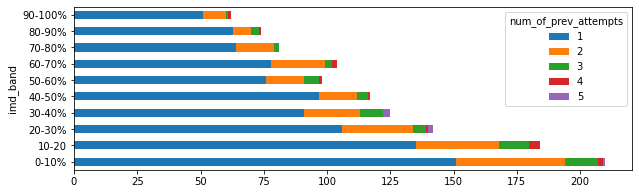

In [28]:
pd.crosstab(filtered_student_info_previous_attempt_not_0_lower_A_Level.imd_band, filtered_student_info_previous_attempt_not_0_lower_A_Level.num_of_prev_attempts).plot.barh(stacked = True, figsize=(10,3));

Question: How was the final Result Stats based on Course Module for student which education level is lower than A level?

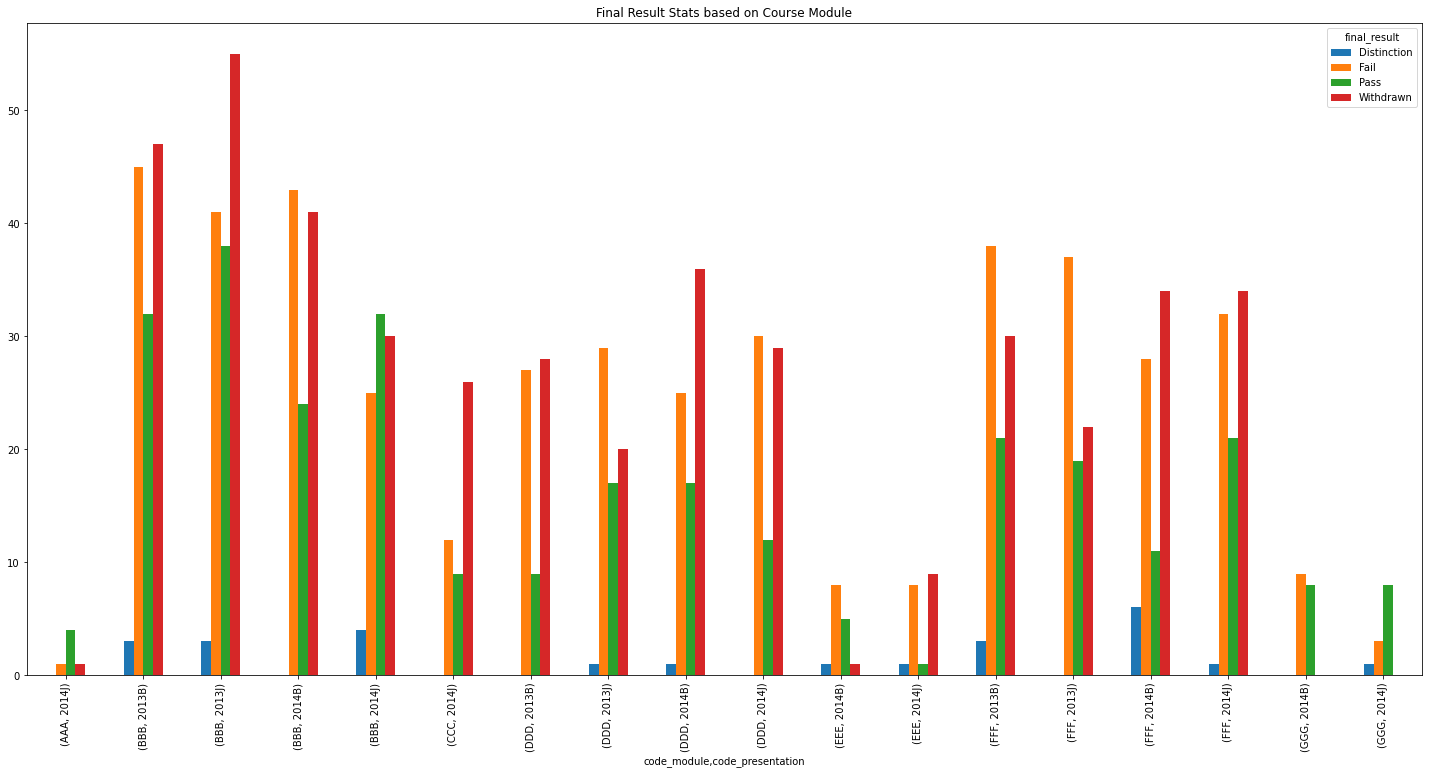

In [29]:
filtered_student_info_previous_attempt_not_0_lower_A_Level.groupby(['code_module','code_presentation','final_result']).size().unstack().plot(kind='bar', title='Final Result Stats based on Course Module',figsize=(25,12))
plt.show()

In maximum courses, students with education of <i>Lower Than A Level</i> did poorly. Many of them either failed or withdrawn.

Question: How was the final Result Stats based on Gender for students whose education level is lower than A level?

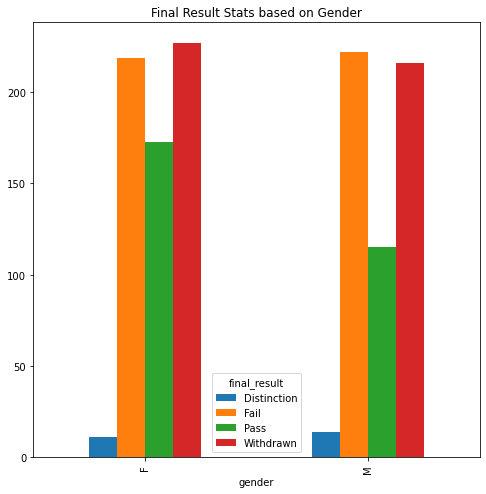

In [30]:
filtered_student_info_previous_attempt_not_0_lower_A_Level.groupby(['gender','final_result']).size().unstack().plot(kind='bar', title='Final Result Stats based on Gender',figsize=(8,8))
plt.show()

It shows withdrawn rate is much higher with Male and Failure rate is higher with Female.

In [33]:
# Join Student_Vle and filtered_student_info_previous_attempt_not_0_lower_A_Level [Filtered version of student_info]

# Get mean & sum of sum_click from group of 'id_student', 'code_module', 'code_presentation'
student_clicks = student_vle.groupby(['id_student', 'code_module', 'code_presentation']).agg({'sum_click':['mean','sum']})
# Add indexing
student_clicks.reset_index(level=[0,1,2], inplace=True)
student_clicks.columns = ['id_student', 'code_module', 'code_presentation', 'mean_clicks', 'sum_clicks']

# merging student_clicks with filtered version of student_info
filtered_student_click_info = pd.merge(filtered_student_info_previous_attempt_not_0_lower_A_Level,student_clicks, how='left', left_on=['id_student', 'code_module', 'code_presentation'],right_on=['id_student', 'code_module', 'code_presentation'])
filtered_student_click_info = filtered_student_click_info[['code_module','code_presentation','id_student','gender','region','highest_education','imd_band','age_band','num_of_prev_attempts','studied_credits','disability','mean_clicks','sum_clicks','final_result']]
filtered_student_click_info.reset_index(level=[0], inplace=True)
filtered_student_click_info.head()

,index,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,mean_clicks,sum_clicks,final_result
0,0,AAA,2014J,135335,F,East Anglian Region,Lower Than A Level,20-30%,0-35,1,120,N,1.777778,16.0,Withdrawn
1,1,AAA,2014J,155984,F,East Anglian Region,Lower Than A Level,70-80%,0-35,1,120,N,3.096257,1737.0,Pass
2,2,AAA,2014J,1472925,F,East Anglian Region,Lower Than A Level,40-50%,35-55,1,60,Y,3.709220,523.0,Pass
3,3,AAA,2014J,1970390,M,West Midlands Region,Lower Than A Level,0-10%,35-55,1,120,N,3.743537,3620.0,Pass
4,4,AAA,2014J,2073016,F,London Region,Lower Than A Level,30-40%,35-55,1,60,N,2.306667,173.0,Fail


Question: Clicks with respect to final result for the students who has previous attemps and education level lower than a level-

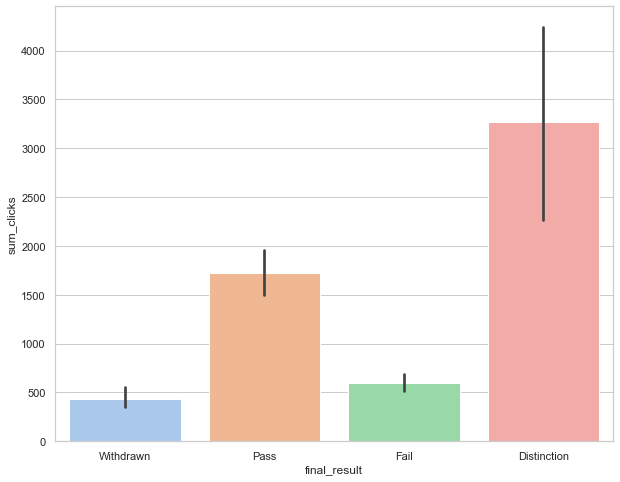

In [34]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
plt.figure(figsize=(10,8))
sns.barplot(x='final_result', y = 'sum_clicks', data = filtered_student_click_info)

We can see that those who got Distinction,they have almost double number of clicks then those who have Pass. And students who have withdrawn or failed, have very low count in term of click.

In [35]:
# Merge student_vle and vle table data
#student_vle_merge = student_vle.merge(vle[['id_site', 'activity_type']], on='id_site', how='left')

In [36]:
# merging student_clicks with Filtered version of student_info
# then mergin the result with vle to get the activity in one place
filterd_student_click_info = pd.merge(filtered_student_info_previous_attempt_not_0_lower_A_Level,student_clicks, how='left', left_on=['id_student', 'code_module', 'code_presentation'],right_on=['id_student', 'code_module', 'code_presentation'])
filterd_student_click_info_with_activity = pd.merge(filterd_student_click_info,vle, how='left', left_on=['code_module', 'code_presentation'],right_on=['code_module', 'code_presentation'])
filterd_student_click_info_with_activity = filterd_student_click_info_with_activity[['code_module','code_presentation','id_student','gender','region','highest_education','imd_band','age_band','num_of_prev_attempts','studied_credits','disability','mean_clicks','sum_clicks','activity_type','final_result']]
filterd_student_click_info_with_activity.reset_index(level=[0], inplace=True)
filterd_student_click_info_with_activity.head()

,index,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,mean_clicks,sum_clicks,activity_type,final_result
0,0,AAA,2014J,135335,F,East Anglian Region,Lower Than A Level,20-30%,0-35,1,120,N,1.777778,16.0,resource,Withdrawn
1,1,AAA,2014J,135335,F,East Anglian Region,Lower Than A Level,20-30%,0-35,1,120,N,1.777778,16.0,resource,Withdrawn
2,2,AAA,2014J,135335,F,East Anglian Region,Lower Than A Level,20-30%,0-35,1,120,N,1.777778,16.0,oucontent,Withdrawn
3,3,AAA,2014J,135335,F,East Anglian Region,Lower Than A Level,20-30%,0-35,1,120,N,1.777778,16.0,resource,Withdrawn
4,4,AAA,2014J,135335,F,East Anglian Region,Lower Than A Level,20-30%,0-35,1,120,N,1.777778,16.0,oucontent,Withdrawn


Q- As of this data we consider the click count as a measure of effort. We'll check how the students who passed,failed,withdrawn or got distinction gave their effort to each of the activity. By reviewing them, we may get an idea of their behavior.

NB: We are doing this analysis on the students who took previous attempts and have the education level of <i>lower than a level</i>

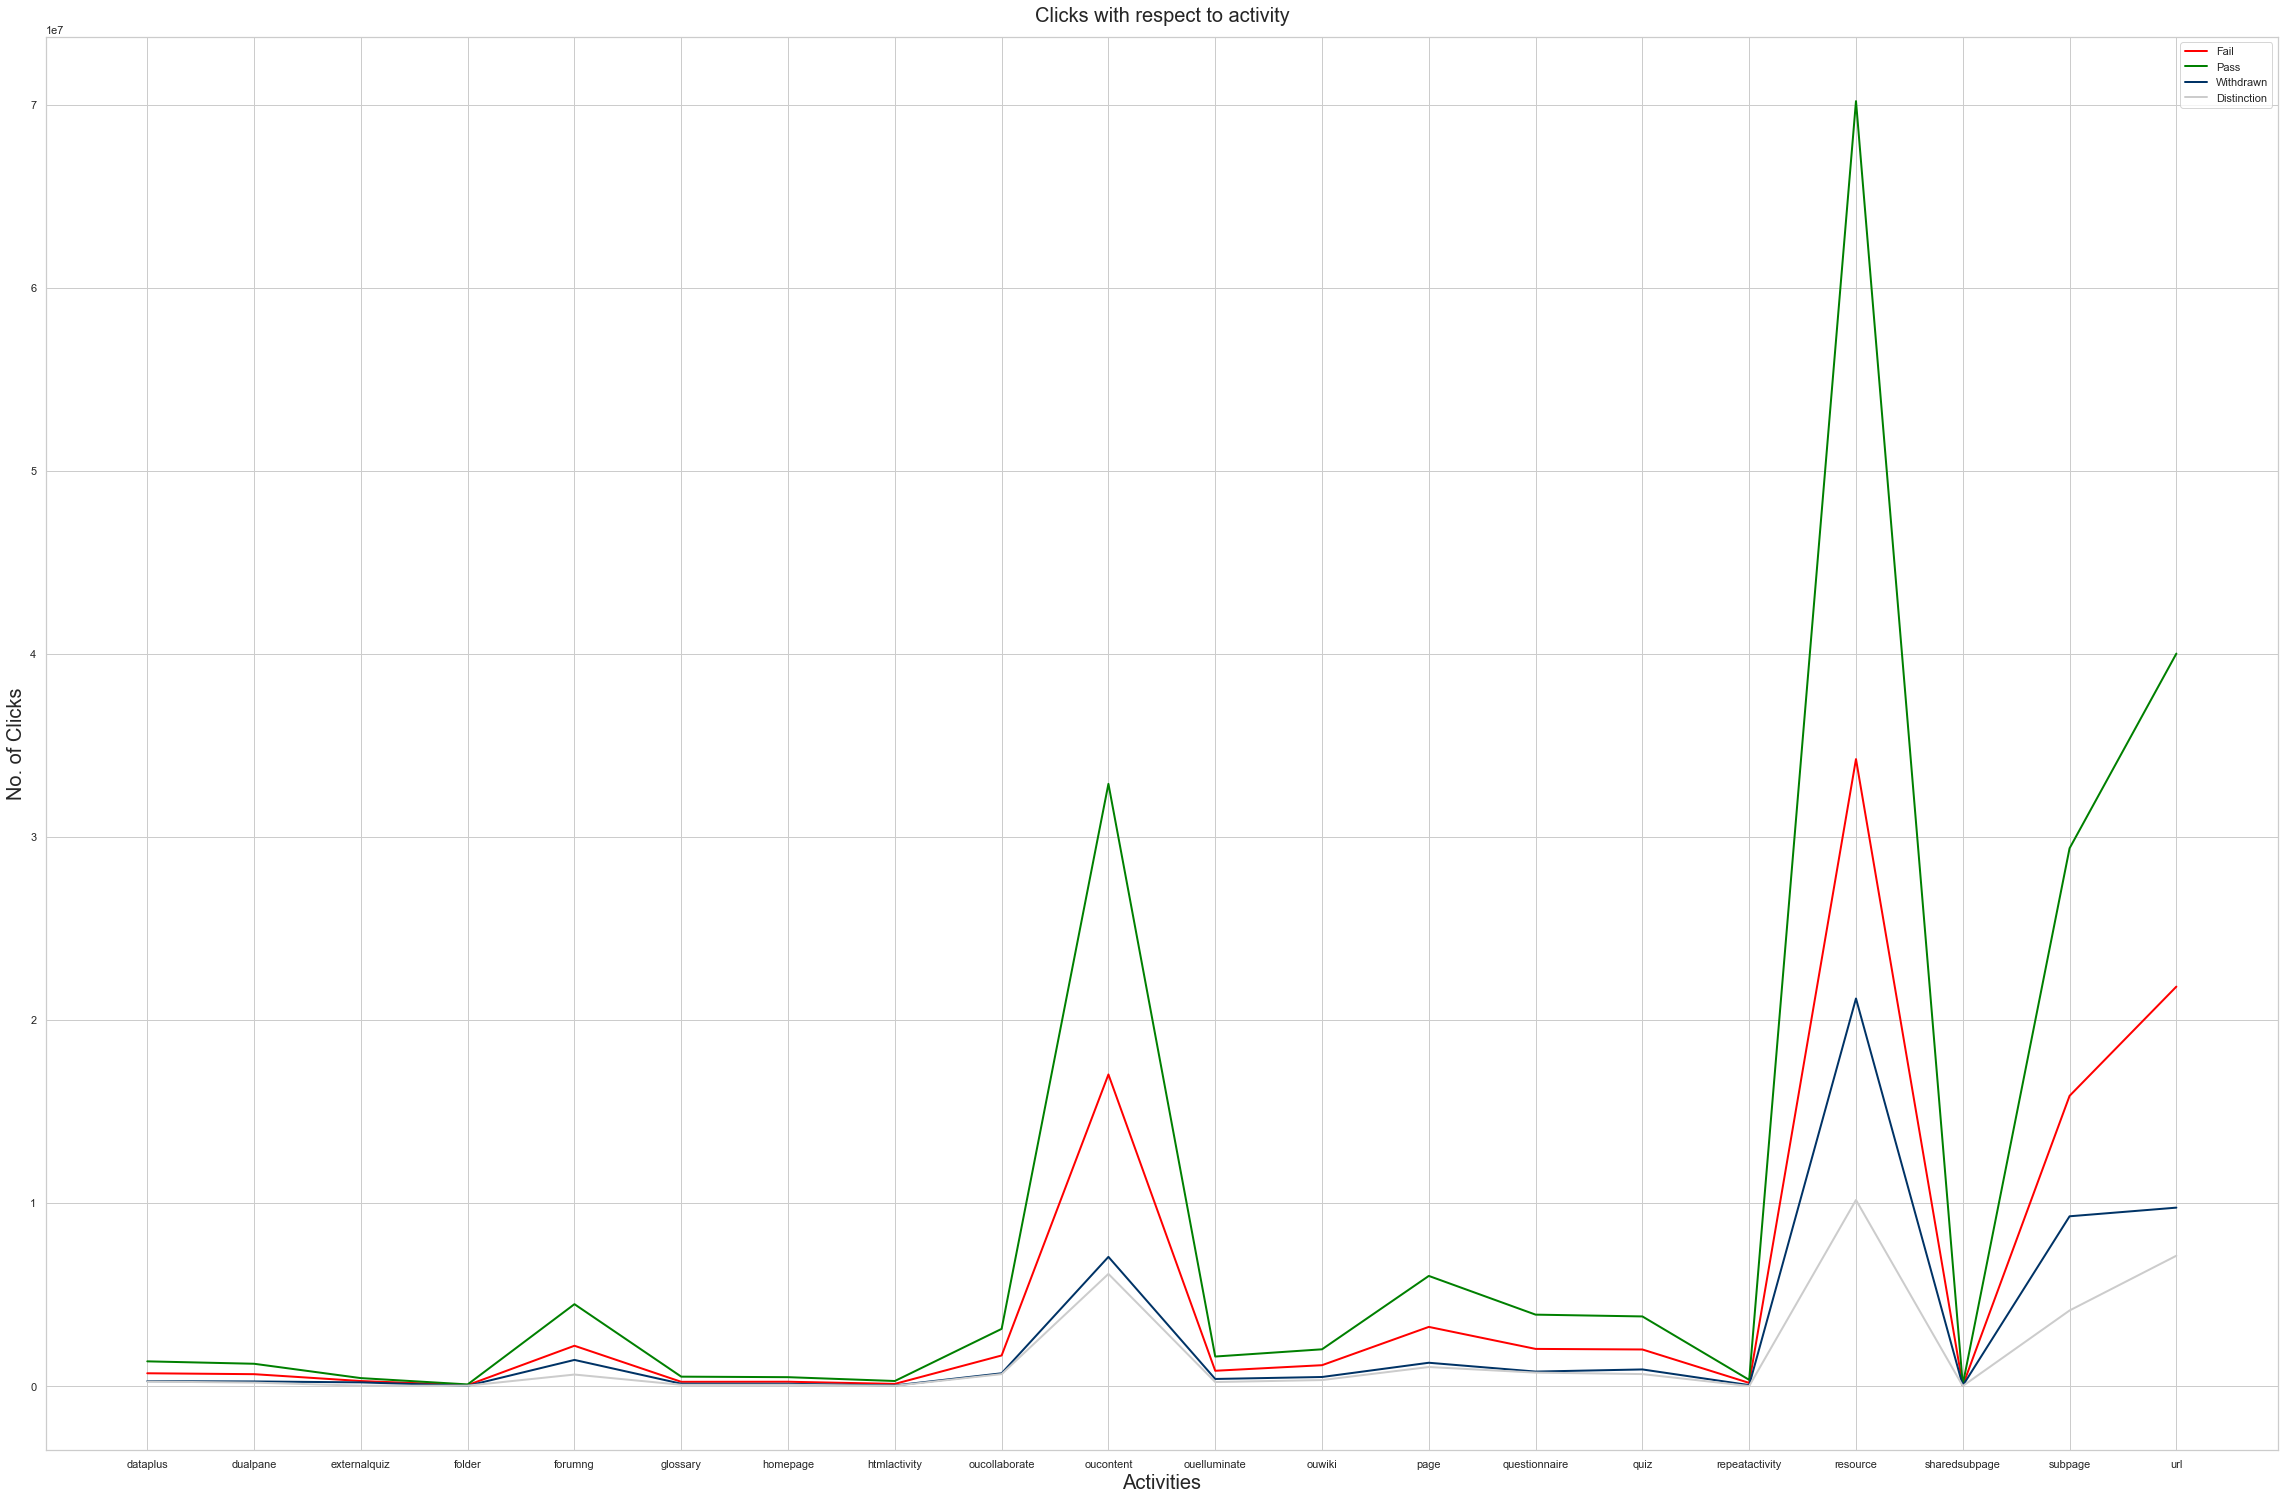

In [65]:
fail = filterd_student_click_info_with_activity['final_result'] == 'Fail'
filterd_student_click_info_with_activity_fail = pd.DataFrame(filterd_student_click_info_with_activity[fail].groupby(['activity_type'])['sum_clicks'].sum())
filterd_student_click_info_with_activity_fail.reset_index(inplace = True)

passs = filterd_student_click_info_with_activity['final_result'] == 'Pass'
filterd_student_click_info_with_activity_pass = pd.DataFrame(filterd_student_click_info_with_activity[passs].groupby(['activity_type'])['sum_clicks'].sum())
filterd_student_click_info_with_activity_pass.reset_index(inplace = True)

withdrawn = filterd_student_click_info_with_activity['final_result'] == 'Withdrawn'
filterd_student_click_info_with_activity_withdrawn = pd.DataFrame(filterd_student_click_info_with_activity[withdrawn].groupby(['activity_type'])['sum_clicks'].sum())
filterd_student_click_info_with_activity_withdrawn.reset_index(inplace = True)

distinction = filterd_student_click_info_with_activity['final_result'] == 'Distinction'
filterd_student_click_info_with_activity_distinction = pd.DataFrame(filterd_student_click_info_with_activity[distinction].groupby(['activity_type'])['sum_clicks'].sum())
filterd_student_click_info_with_activity_distinction.reset_index(inplace = True)


fig= plt.figure(figsize=(40,26)) 
ax1 = plt.plot( 'activity_type', 'sum_clicks', data=filterd_student_click_info_with_activity_fail, marker='', color='#FF0000', linewidth=2)
ax2 = plt.plot( 'activity_type', 'sum_clicks', data=filterd_student_click_info_with_activity_pass, marker='', color='#008000', linewidth=2)
ax3 = plt.plot( 'activity_type', 'sum_clicks', data=filterd_student_click_info_with_activity_withdrawn, marker='', color='#003366', linewidth=2)
ax4 = plt.plot( 'activity_type', 'sum_clicks', data=filterd_student_click_info_with_activity_distinction, marker='', color='#cccccc', linewidth=2)
plt.legend(labels =['Fail','Pass','Withdrawn','Distinction'])
plt.ylabel('No. of Clicks', fontsize=20)
plt.xlabel('Activities', fontsize=20)
plt.title('Clicks with respect to activity', loc='center',pad=15, fontsize=20);

<p>
Here red denotes to clicks for failed students, blue denotes to withdrawn students, light grey for distinction and green for passed students. <br/>
Interestingly enough, we found that, the students who failed and withdrawn their courses , gave more effort from those got distinction.<br/><br/>

Here is a overall view for our final merged dataset.
<p>

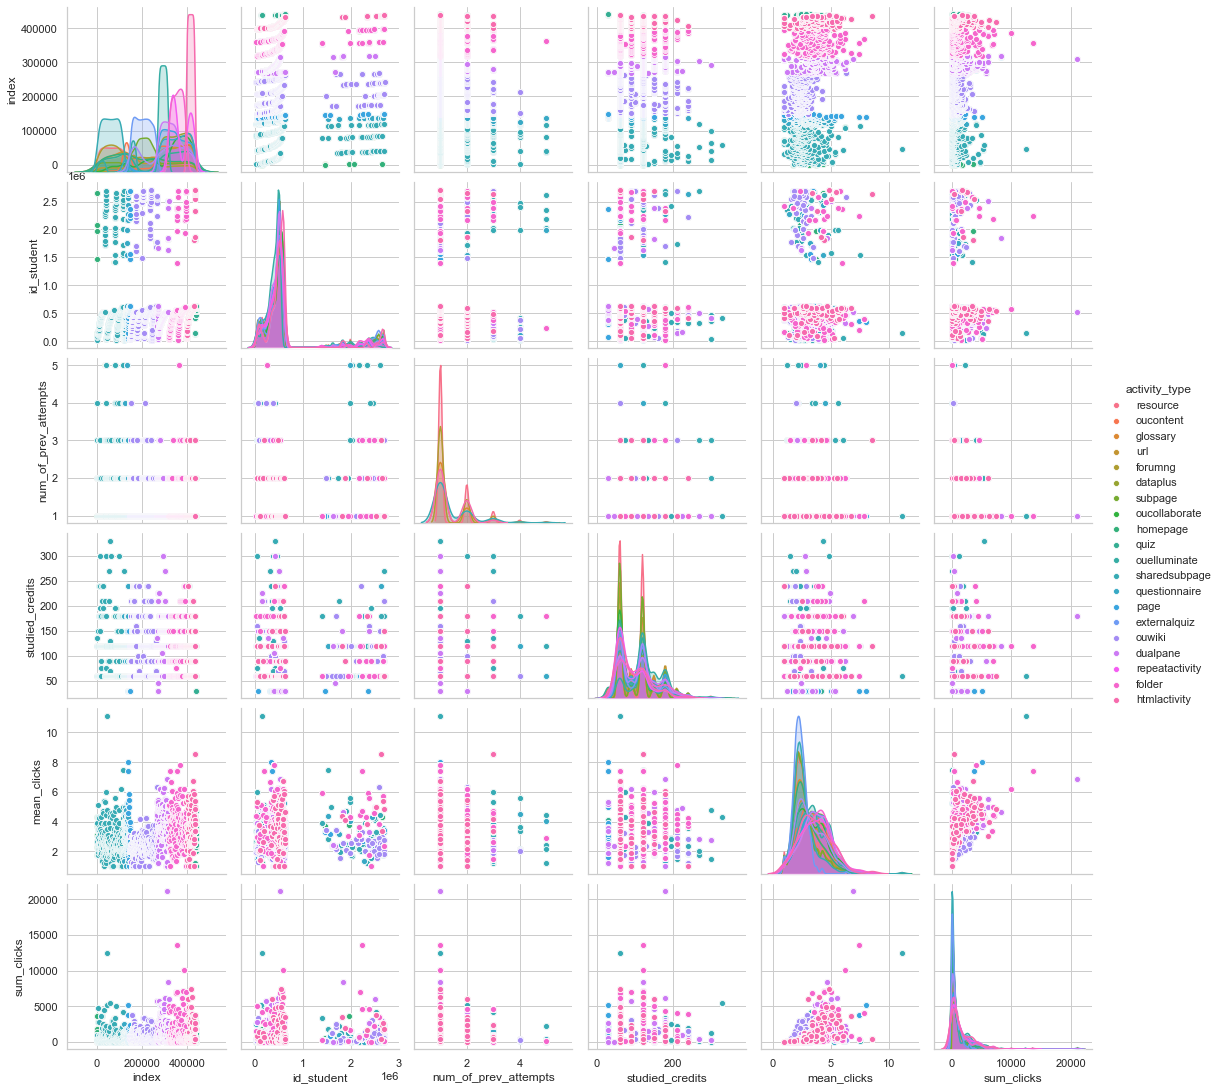

In [39]:
sns.pairplot(filterd_student_click_info_with_activity, hue="activity_type");

Question: Which activity is most popular among the students?

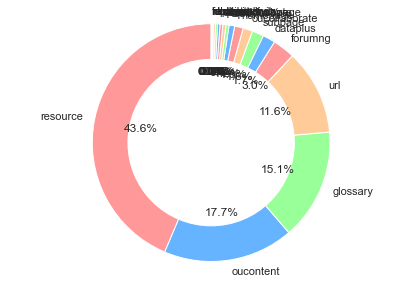

In [66]:
#student_vle_merge = student_vle.merge(vle[['id_site', 'activity_type']], on='id_site', how='left')
# Pie chart
labels = filterd_student_click_info_with_activity['activity_type'].unique()
sizes = filterd_student_click_info_with_activity['activity_type'].value_counts()
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

<a id='Results'></a>
## 7. Conclusions
###### [TOC](#TOC)